<a href="https://colab.research.google.com/github/WambuiMunene/Tensorflow-Notebooks/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [3]:
# Load the Data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


In [4]:
# the data is only in 2D!
# convolution expects height X width X color
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
X_train[0].shape

(28, 28, 1)

In [7]:
# build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D (32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D (64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D (128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense (K, activation='softmax')(x)

model = Model (i , x)

In [8]:
# Compile and fit
# ote: make sure you are using GPU for this!

model.compile (optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

r = model.fit  (X_train, y_train, validation_data = (X_test, y_test),epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7489 - loss: 0.6832 - val_accuracy: 0.8543 - val_loss: 0.3925
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8628 - loss: 0.3692 - val_accuracy: 0.8749 - val_loss: 0.3413
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8819 - loss: 0.3136 - val_accuracy: 0.8851 - val_loss: 0.3182
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8946 - loss: 0.2773 - val_accuracy: 0.8931 - val_loss: 0.2973
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9063 - loss: 0.2497 - val_accuracy: 0.8893 - val_loss: 0.3128
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9135 - loss: 0.2280 - val_accuracy: 0.8960 - val_loss: 0.2993
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9213 - loss: 0.2066 - val_accuracy: 0.8955 - val_loss: 0.2874
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9299 - loss: 0.188

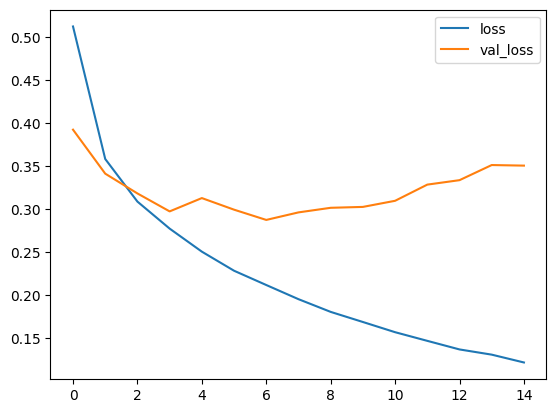

In [11]:
# plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label= 'loss')
plt.plot(r.history['val_loss'],label= 'val_loss')
plt.legend();

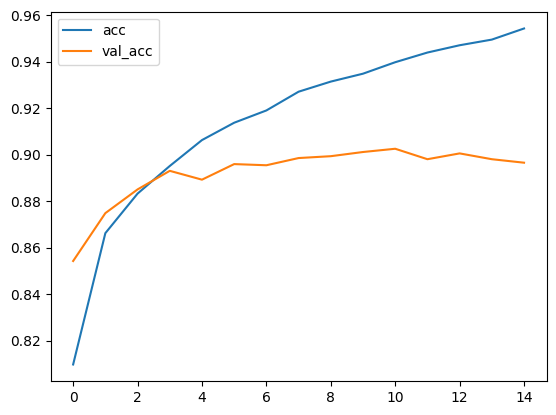

In [12]:
# plot accuracy per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label= 'acc')
plt.plot(r.history['val_accuracy'],label= 'val_acc')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


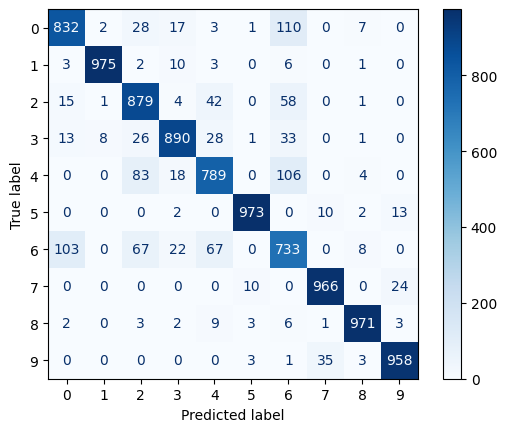

In [14]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# make predictions
y_pred = model.predict(X_test)
y_pred_classes =np.argmax(y_pred,axis=1)
y_true = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Example: Convert the integer labels to their corresponding names
import numpy as np
y_true_names = [labels[i] for i in y_true]
y_pred_names = [labels[i] for i in y_pred_classes]

print("Example true labels:", y_true_names[:10])
print("Example predicted labels:", y_pred_names[:10])


Example true labels: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
Example predicted labels: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


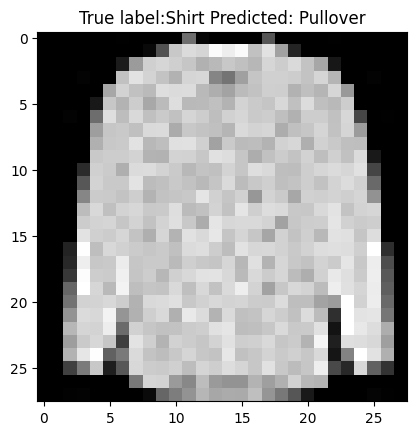

In [26]:
# show some misclassified examples
misclassified_idx = np.where(y_pred_classes!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap = 'gray')
plt.title ("True label:%s Predicted: %s" % (labels[y_test[i]],labels[y_pred_classes[i]])) ;
